In [1]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.base import LegData, SpreadData

from statistical_arbitrage_strategy import StatisticalArbitrageStrategy
from grid_trading_strategy import GridTradingStrategy

In [2]:
# 设置价差
spread = SpreadData(
    name="BTC-Spread",
    legs=[LegData("XBTUSD.BITMEX"), LegData("btcusdt.BINANCE")],
    price_multipliers={"XBTUSD.BITMEX": 1, "btcusdt.BINANCE": -1},
    trading_multipliers={"XBTUSD.BITMEX": 1, "btcusdt.BINANCE": -1},
    active_symbol="XBTUSD.BITMEX",
    inverse_contracts={"XBTUSD.BITMEX": True, "btcusdt.BINANCE": False},
    min_volume=1
)

In [3]:
# 计算手续费
rate_1 = 0.1/100
rate_2 = 0.075/100
rate = (rate_1 + rate_2) / 2

In [6]:
# 执行回测
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2020, 1, 1),
    end=datetime(2020, 6, 30),
    rate=rate,
    slippage=0.6,
    size=1,
    pricetick=0.5,
    capital=100_000,
)

statarb_setting = {
    "boll_window": 60,
    "boll_dev": 4
}

grid_setting = {
    "grid_price": 50,
    "grid_volume": 5,
    "max_pos": 20
}
engine.add_strategy(GridTradingStrategy, grid_setting)

2020-06-21 17:12:16.762688	开始加载历史数据
2020-06-21 17:12:16.762688	历史数据加载完成，数据量：243505
2020-06-21 17:12:16.778363	策略初始化完成
2020-06-21 17:12:16.778363	开始回放历史数据
2020-06-21 17:12:18.629921	历史数据回放结束
2020-06-21 17:12:18.629921	开始计算逐日盯市盈亏
2020-06-21 17:12:18.645471	逐日盯市盈亏计算完成
2020-06-21 17:12:18.645471	开始计算策略统计指标
2020-06-21 17:12:18.661102	------------------------------
2020-06-21 17:12:18.661102	首个交易日：	2020-01-11
2020-06-21 17:12:18.661102	最后交易日：	2020-06-18
2020-06-21 17:12:18.667457	总交易日：	160
2020-06-21 17:12:18.667457	盈利交易日：	42
2020-06-21 17:12:18.667457	亏损交易日：	9
2020-06-21 17:12:18.667457	起始资金：	100,000.00
2020-06-21 17:12:18.667457	结束资金：	213,244.23
2020-06-21 17:12:18.667457	总收益率：	113.24%
2020-06-21 17:12:18.667457	年化收益：	169.87%
2020-06-21 17:12:18.667457	最大回撤: 	-346.26
2020-06-21 17:12:18.667457	百分比最大回撤: -0.34%
2020-06-21 17:12:18.667457	最长回撤天数: 	24
2020-06-21 17:12:18.667457	总盈亏：	113,244.23
2020-06-21 17:12:18.667457	总手续费：	28,282.77
2020-06-21 17:12:18.667457	总滑点：	1,398.00
2020-06-21 17:12:

c:\github\cs-vnpy\vnpy\app\spread_trading\backtesting.py:286: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


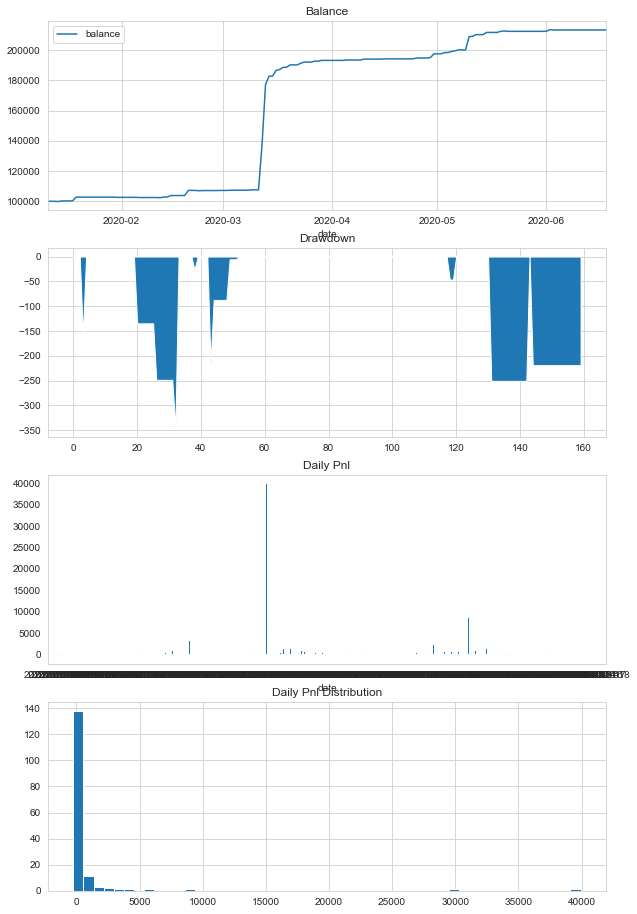

In [7]:
# 输出结果
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()